In [1]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import date, datetime

## 4- Read the DB with the info and make a window/partition function for every 5 days

In [2]:
conn = sqlite3.connect('./db/coingecko')
c = conn.cursor()

In [3]:
c.execute('''
SELECT utc_datetime, usd_price
FROM bitcoin_price_hist''')

In [4]:
btc_price = pd.DataFrame(c.fetchall(), columns=['utc_datetime','usd_price'])

In [5]:
btc_price.head()

,utc_datetime,usd_price
0,2022-01-01,47309.21
1,2022-01-02,47317.14
2,2022-01-03,46891.53
3,2022-01-04,46498.01
4,2022-01-05,45971.16


In [6]:
number_of_days = 5

In [7]:
btc_price['usd_price_ewm'] = round(btc_price['usd_price'].ewm(number_of_days).mean(),2)

In [8]:
btc_price['usd_price_sma'] = round(btc_price['usd_price'].rolling(number_of_days).mean(),2)

In [9]:
btc_price['usd_price_cma'] = round(btc_price['usd_price'].expanding().mean(),2)

In [10]:
btc_price.head(10)

,utc_datetime,usd_price,usd_price_ewm,usd_price_sma,usd_price_cma
0,2022-01-01,47309.21,47309.21,NaN,47309.21
1,2022-01-02,47317.14,47313.54,NaN,47313.18
2,2022-01-03,46891.53,47146.59,NaN,47172.63
3,2022-01-04,46498.01,46937.81,NaN,47003.97
4,2022-01-05,45971.16,46668.45,46797.41,46797.41
5,2022-01-06,43210.68,45801.97,45977.70,46199.62
6,2022-01-07,42056.26,44936.02,44925.53,45607.71
7,2022-01-08,41741.49,44242.25,43895.52,45124.44
8,2022-01-09,41991.15,43776.87,42994.15,44776.29
9,2022-01-10,41690.86,43362.24,42138.09,44467.75


## 6- Show the results in a graph

In [11]:
btc_price = btc_price.set_index('utc_datetime')

In [12]:
plt.style.use('default')
%matplotlib inline

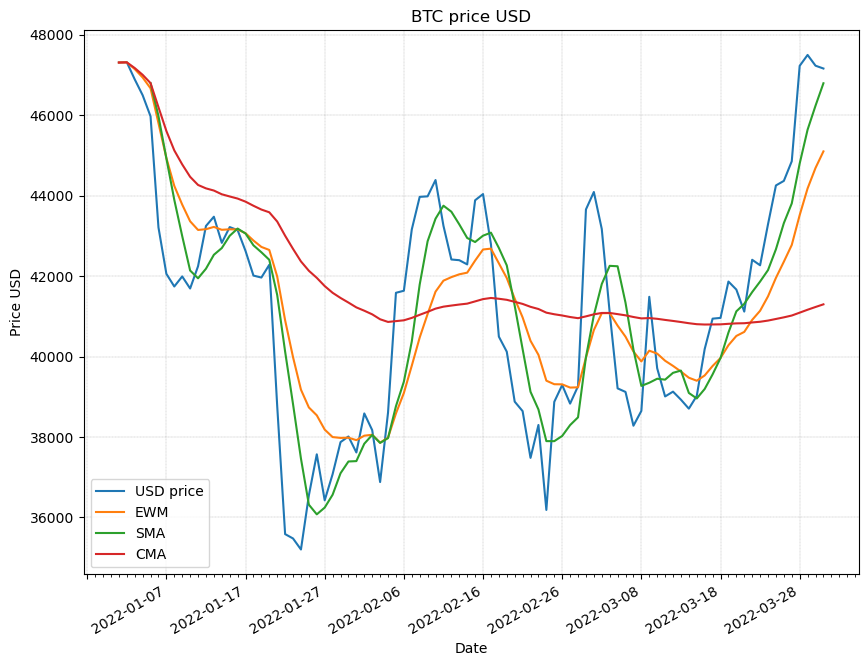

In [13]:
plt.rcParams["figure.figsize"] = (10,8)
plt.title('BTC price USD')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.plot(btc_price['usd_price'])
plt.plot(btc_price['usd_price_ewm'])
plt.plot(btc_price['usd_price_sma'])
plt.plot(btc_price['usd_price_cma'])
plt.legend(['USD price', 'EWM', 'SMA','CMA'])
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.2)
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))